# Experimento 01
---
Ejemplo de los modelos clásicos de epidemias, los modelos de movimiento y los modelos epidémicos con metapoblaciones. En este `notebook` se utiliza `solve_ivp` del módulo `scipy.integrate`, para resolver numéricamente estos sistemas de ecuaciones diferenciales.

In [1]:
# Para ubicar ruta en /MetapopulationEpidemicModels

import os
os.chdir("..")
os.chdir("..")

# IMPORTANTE!!! Solo correr UNA vez.

In [2]:
from IPython.display import SVG, display
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import models.numba_models as nm
import models.clasic_epidemic_models as cem
import models.mov_models as mm

## Modelos Epidémicos Clásicos


### Modelo SIR

En este modelo se consideran $3$ clases compartimentales: *Susceptibles*, *Infestados* y *Recuperados*.

$$
\begin{align*}
    \dot{S} & = - \beta S I \\ 
    \dot{I} & =   \beta S I - \gamma I \\
    \dot{R} & =   \gamma I
\end{align*}
$$
donde $\beta$ es la tasa de transmisión de la enfermedad y $\gamma$ la tasa de recuperación que es lo mismo que $1/D$ siendo $D$ el número de días promedio que dura la enfermedad en un individuo. Además $\beta = \frac{\kappa \delta}{N}$ donde $N$ es el tamaño de la población, $\kappa$ es la cantidad de contactos por unidad de tiempo y $\delta$ es la probabilidad de contraer la enfermedad al hacer contacto con un portador de esta; este también es conocido como la transmisiblidad de la enfermedad. De esta manera para diferentes valores de $\kappa$ y $\delta$ se puede obtener el mismo modelo.

Consideremos los parámetros $\beta = 0,000012$ y $\gamma = 1/6$, y los valores iniciales $S(t_0) = 49 000 $, $ I(t_0) = 1 $, y $ R(t_0) = 0 $. Note que en este caso los parámetros $\kappa$ y $\delta$ pudieran tener los siguiente valores, y tendríamos el mismo modelo:

| $\kappa$ | $\delta$ |   
|----------|---------|  
| 2        |    0.3  |
| 3        |    0.2  |
| 4        |    0.15 |  
| 4.5      | 0.13333 |  
| 5        |    0.12 |  
| 6        |    0.10 |  

Finalmente de la resolución del modelo se obtiene:

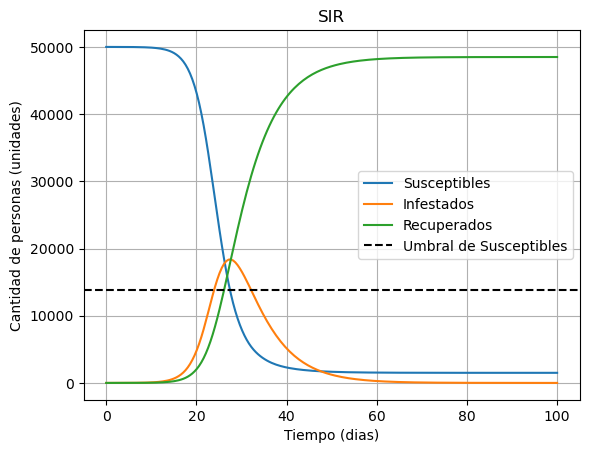

In [3]:
Beta = 4 * 0.15 / 50000
Gamma = 1/6
sir = cem.SIR_Model()
sir.set_params([Beta, Gamma])
sir.set_initial_value(0, np.array([50000-1,1,0]))
sir.solve((0,100), np.linspace(0,100,200))
sir.plot_result(show=False)
sir.plot_result('umbral')

### Modelo SIS

En este modelo se consideran $2$ clases compartimentales: *Susceptibles* e *Infestados*.

$$
\begin{align*}
    \dot{S} & = - \beta S I + \gamma I \\ 
    \dot{I} & =   \beta S I - \gamma I \\
\end{align*}
$$
Consideremos los parámetros $\beta = 0,000012$ y $\gamma = 1/6$, y los valores iniciales $S(t_0) = 49 000 $ y $ I(t_0) = 1 $, el comportamiento del modelo resulta ser:

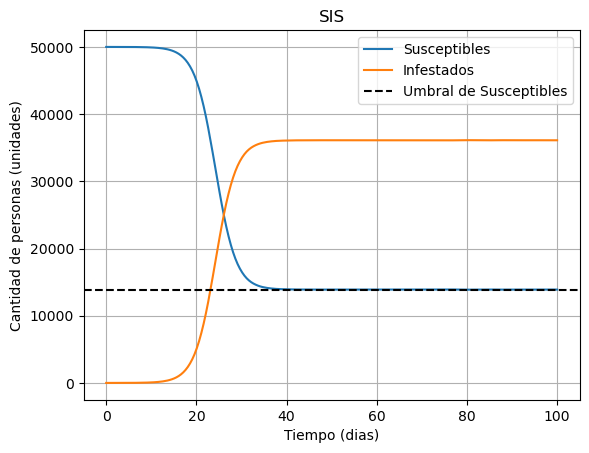

In [4]:
Beta = 4 * 0.15 / 50000
Gamma = 1/6
sis = cem.SIS_Model()
sis.set_params([Beta, Gamma])
sis.set_initial_value(0, np.array([50000-1,1]))
sis.solve((0,100), np.linspace(0,100,200))
sis.plot_result(show=False)
sis.plot_result('umbral')

### Modelo SEIR

En este modelo se consideran $4$ clases compartimentales: *Susceptibles*, *Expuestos*, *Infestados* y *Recuperados*.

$$
\begin{align*}
    \dot{S} & = - \beta S I \\ 
    \dot{E} & =   \beta S I - \sigma E \\
    \dot{I} & =   \sigma E - \gamma I \\
    \dot{R} & =   \gamma I
\end{align*}
$$
Consideremos los parámetros $\beta = 0,000012$, $\sigma = 1/3$ y $\gamma = 1/6$, y los valores iniciales $S(t_0) = 49 000 $, $E(t_0) = 1$, $ I(t_0) = 0 $, y $ R(t_0) = 0 $, el comportamiento del modelo resulta ser:

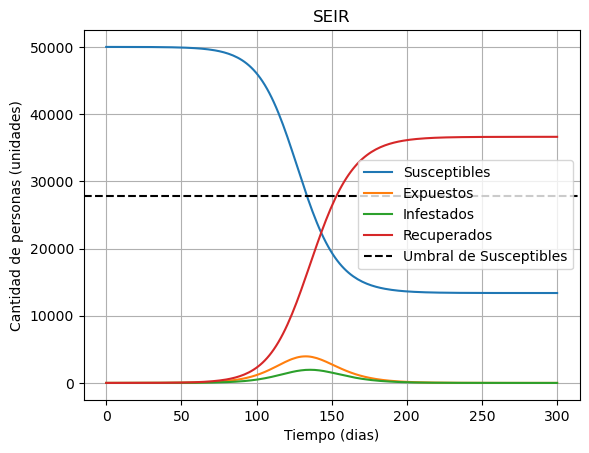

In [5]:
Beta = 4 * 0.15 / 50000
Sigma = 1/3
Gamma = 1/6
sis = cem.SEIR_Model()
sis.set_params([Beta, Sigma, Gamma])
sis.set_initial_value(0, np.array([50000-1,1,0,0]))
sis.solve((0,300), np.linspace(0,300,200))
sis.plot_result(show=False)
sis.plot_result('umbral')

## Modelos de Movimiento poblacional

### Modelo Euleriano
Este modelo considera que las personas se trasladan de una localización a otra por un tiempo indefinido. Para ello se consideran:
- $K$: regiones o localizaciones
- $N_i$: cantidad de habitantes de la localidad $i$
- $F_{ij}$: tasa de migración de la localidad $i$ a la $j$, $f_{ii} = 0, \forall i = 1,...,K$

El modelo quedaría:
$$
\begin{align*}
    \dot{N_i} & = - \sum_{j=1}^K f_{ij} N_i + \sum_{j=1}^K f_{ji} N_j , \qquad \forall i = 1,...,K
\end{align*}
$$
con $K$ ecuaciones y $K(K-1)$ parámetros. Utilizando $3$ nodos

In [6]:
F = np.array([[0.        , 0.26841269, 0.28856755],
              [0.01966866, 0.        , 0.12332699],
              [0.0565096, 0.02810482, 0.        ]])*0.22
y0 = np.array([4884., 2361., 2328.])

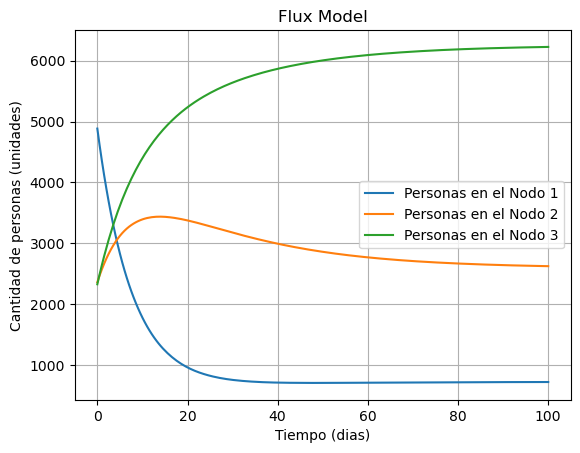

In [7]:
euler = mm.FLUX_Model()
euler.set_params(F)
euler.set_initial_value(0,y0)
euler.solve((0,100), t_eval=np.linspace(0,100,200))
euler.plot_result()

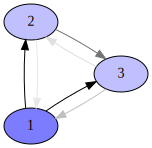

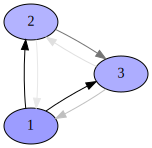

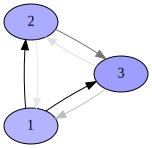

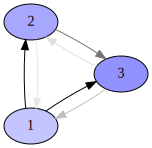

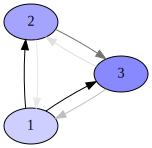

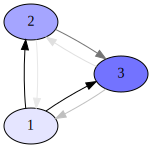

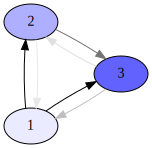

In [8]:
for i in [0,5,10,15,20,40,80]:
    G = euler.generate_graph_population_pydot([str(f'{j+1}') for j in range(3)], euler._result.y[:,i], edge_alpha=20, edge_len=0.3)
    svg = G.create_svg()
    display(SVG(svg))

### Modelo Lagrangiano
Este modelo considera que las personas se trasladan de una localización a otra por un tiempo indefinido. Para ello se consideran:
- $K$: regiones o localizaciones
- $N_{ij}$: cantidad de habitantes de la localidad $i$ que se encuentran en $j$
- $\phi_{ij}$: tasa de migración de la localidad $i$ a la $j$, $\phi_{ii} = 0, \forall i = 1,...,K$
- $\tau_{ij}$: tasa de migración de la localidad $i$ que están en $j$ y regresan $i$, $\tau_{ii} = 0, \forall i = 1,...,K$

El modelo quedaría:
$$
\begin{align*}
    \dot{N_{ii}} & = - \sum_{j=1}^K \phi_{ij} N_{ii} + \sum_{j=1}^K \tau_{ij} N_{ij} , \qquad \forall i = 1,...,K \\
    \dot{N_{ij}} & = - \tau_{ij} N_{ij} + \phi_{ij} N_{ii} , \qquad \forall i,j = 1,...,K \quad (i \ne j)
\end{align*}
$$
con $K^2$ ecuaciones y $2K(K-1)$ parámetros. Utilizando $3$ nodos.

In [58]:
Out, In = mm.GenerateParams_LAGRANGE(3)
y0 = mm.GenerateY0_LAGRANGE(3)
Out = np.array([[0.        , 0.00597923, 0.03073218],
       [0.22095346, 0.        , 0.25083181],
       [0.02584748, 0.12901587, 0.        ]])*0.3
In = np.array([[0.        , 0.18785132, 0.83766116],
       [0.39070717, 0.        , 0.01349362],
       [0.32508156, 0.06754153, 0.        ]])

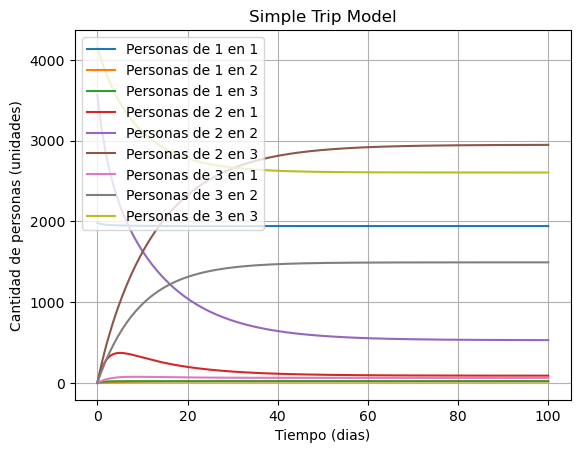

In [59]:
lagrange = mm.SIMPLE_TRIP_Model()
lagrange.set_params(Out, In)
lagrange.set_initial_value(0,y0)
lagrange.solve((0,100), t_eval=np.linspace(0,100,200))
lagrange.plot_result()

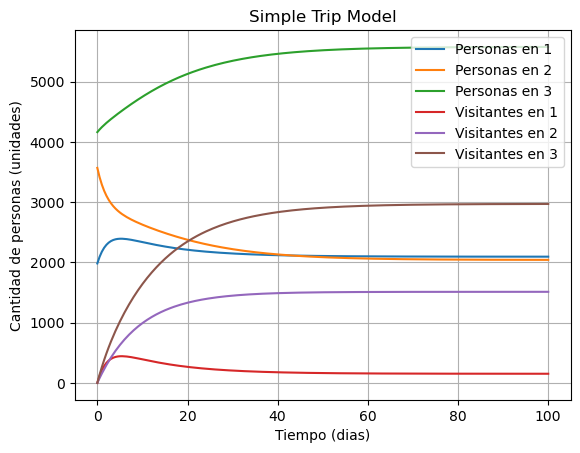

In [60]:
lagrange.plot_result('all-vis', show=False)
lagrange.plot_result('all-vis-only')

(3, 200)


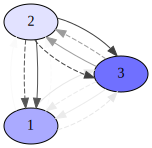

In [73]:
y = lagrange._result.y.reshape((3,3, lagrange._result.t.shape[0]))
print(y.sum(axis=1).shape)
G = lagrange.generate_graph_population_pydot(['1','2','3'], y.sum(axis=0)[:,10] - np.diagonal(y[:,:,5]))
svg = G.create_svg()
display(SVG(svg))